In [2]:
import tensorflow_datasets as tfds
imdb_plaintext, info_plaintext = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
imdb_subwords, info_subwords = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete60B0KB/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete60B0KB/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete60B0KB/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteL5ZXHK/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteL5ZXHK/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteL5ZXHK/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [10]:
info_subwords.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(None,), dtype=int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

In [ ]:
for example in imdb_subwords['train'].take(2):
  print(example)

In [ ]:
for example in imdb_subwords['train'].take(2):
  print(example)

In [21]:
for example in imdb_plaintext['train'].take(2):
  print(example[0].numpy())

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was

In [22]:
#get the encoder object included in the download and use it to decode the sequences above
tokenizer_subwords = info_subwords.features['text'].encoder

for example in imdb_subwords['train'].take(2):
  print(tokenizer_subwords.decode(example[0]))

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

In [27]:
#subword text encoding

train_data = imdb_plaintext['train']
training_sentences = []
for s, _ in train_data:
  #loop over all training examples and save to the list
  training_sentences.append(s.numpy().decode('utf8'))

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size= 10000
oov_tok = '<OOV>'

tokenizer_plain_text = Tokenizer(num_words=10000, oov_token=oov_tok)
tokenizer_plain_text.fit_on_texts(training_sentences)
#generate the training sequences
sequences = tokenizer_plain_text.texts_to_sequences(training_sentences)
#decode the first sequence using the tokenizer class
tokenizer_plain_text.sequences_to_texts(sequences[0:1])

len(tokenizer_plain_text.word_index)

88583

In [28]:
# Print the subwords
print(tokenizer_subwords.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [29]:
#encode the first plaintext sentence using the subword text encoder
tokenized_string = tokenizer_subwords.encode(training_sentences[0])
print(tokenized_string)
#decode the sequences
original_string = tokenizer_subwords.decode(tokenized_string)
print(original_string)

[62, 18, 41, 604, 927, 65, 3, 644, 7968, 21, 35, 5096, 36, 11, 43, 2948, 5240, 102, 50, 681, 7862, 1244, 3, 3266, 29, 122, 640, 2, 26, 14, 279, 438, 35, 79, 349, 384, 11, 1991, 3, 492, 79, 122, 188, 117, 33, 4047, 4531, 14, 65, 7968, 8, 1819, 3947, 3, 62, 27, 9, 41, 577, 5044, 2629, 2552, 7193, 7961, 3642, 3, 19, 107, 3903, 225, 85, 198, 72, 1, 1512, 738, 2347, 102, 6245, 8, 85, 308, 79, 6936, 7961, 23, 4981, 8044, 3, 6429, 7961, 1141, 1335, 1848, 4848, 55, 3601, 4217, 8050, 2, 5, 59, 3831, 1484, 8040, 7974, 174, 5773, 22, 5240, 102, 18, 247, 26, 4, 3903, 1612, 3902, 291, 11, 4, 27, 13, 18, 4092, 4008, 7961, 6, 119, 213, 2774, 3, 12, 258, 2306, 13, 91, 29, 171, 52, 229, 2, 1245, 5790, 995, 7968, 8, 52, 2948, 5240, 8039, 7968, 8, 74, 1249, 3, 12, 117, 2438, 1369, 192, 39, 7975]
This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not re

In [30]:
#subwords encoding can even perform well on words that are not commonly found on movie reviewws.
sample_string= 'Tensor_flow, from basics to mastery'
#encoding using the plain text tokenizer
tokenized_string = tokenizer_plain_text.texts_to_sequences([sample_string])
print('Tokenized string is {}'.format(tokenized_string))
# Decode and print the result
original_string = tokenizer_plain_text.sequences_to_texts(tokenized_string)
print ('The original string: {}'.format(original_string))

Tokenized string is [[1, 2966, 37, 1, 6, 1]]
The original string: ['<OOV> flow from <OOV> to <OOV>']


In [31]:
#encode using the subword text encoder
tokenized_string = tokenizer_subwords.encode(sample_string)
print('Tokenized string is {}'.format(tokenized_string))
#decode
original_string = tokenizer_subwords.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

Tokenized string is [6307, 2327, 8024, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: Tensor_flow, from basics to mastery


In [34]:
#show token to subword mapping:
for ts in tokenized_string:
  print('{}---{}'.format(ts, tokenizer_subwords.decode([ts])))

6307---Ten
2327---sor
8024---_
2934---flow
2---, 
48---from 
4249---basi
4429---cs 
7---to 
2652---master
8050---y


In [35]:
#train the model

BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_data, test_data = imdb_subwords['train'], imdb_subwords['test']
#shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)
#Batch and pad the datasets to maximum length of the sequence
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)


In [37]:
import tensorflow as tf
embedding_dim=64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 global_average_pooling1d_1  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 524237 (2.00 MB)
Trainable params: 524237 (2.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
epochs=10
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history= model.fit(train_dataset, epochs=epochs, validation_data = test_dataset)

Epoch 1/10
391/391 [==============================] - 20s 46ms/step - loss: 0.6691 - accuracy: 0.6364 - val_loss: 0.6187 - val_accuracy: 0.6606
Epoch 2/10
391/391 [==============================] - 17s 44ms/step - loss: 0.5096 - accuracy: 0.8076 - val_loss: 0.4442 - val_accuracy: 0.8230
Epoch 3/10
391/391 [==============================] - 18s 45ms/step - loss: 0.3673 - accuracy: 0.8717 - val_loss: 0.3606 - val_accuracy: 0.8646
Epoch 4/10
391/391 [==============================] - 17s 43ms/step - loss: 0.2992 - accuracy: 0.8932 - val_loss: 0.3355 - val_accuracy: 0.8635
Epoch 5/10
391/391 [==============================] - 16s 41ms/step - loss: 0.2594 - accuracy: 0.9079 - val_loss: 0.3136 - val_accuracy: 0.8783
Epoch 6/10
391/391 [==============================] - 17s 42ms/step - loss: 0.2337 - accuracy: 0.9152 - val_loss: 0.3182 - val_accuracy: 0.8714
Epoch 7/10
391/391 [==============================] - 16s 41ms/step - loss: 0.2145 - accuracy: 0.9244 - val_loss: 0.3099 - val_accuracy:

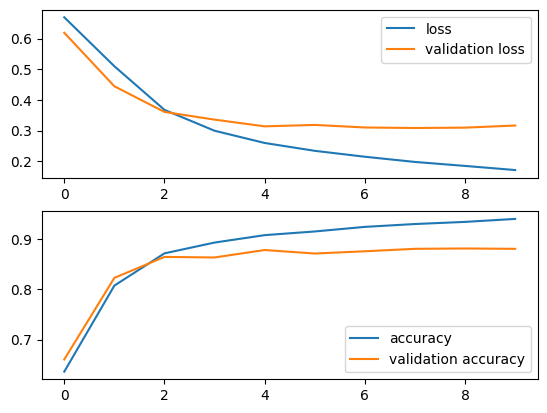

In [42]:
import matplotlib.pyplot as plt

plt, axs = plt.subplots(2)
axs[0].plot(history.history['loss'], label='loss')
axs[0].plot(history.history['val_loss'], label='validation loss')
axs[0].legend()
axs[1].plot(history.history['accuracy'], label='accuracy')
axs[1].plot(history.history['val_accuracy'], label='validation accuracy')
axs[1].legend()
